# 🎻 Part 11: Seaborn Box Plots & Violin Plots (Mapping from Matplotlib Part 6)

**Goal:** Understand how to create, customize, and compare distributions using Seaborn's `boxplot` and `violinplot`, which are powerful, data-aware alternatives to Matplotlib's functions.

---

### Key Learning Objectives
1.  Learn the `sns.boxplot` and `sns.violinplot` functions.
2.  Understand Seaborn's main syntax: `sns.plot_type(data=df, x='categorical_col', y='numeric_col')`.
3.  Use the `hue` parameter for automatic sub-grouping and legend creation (a major upgrade).
4.  Use `sns.catplot()` (the Figure-level function) to easily create subplots for categorical data.
5.  Combine Seaborn's **Axes-level** plots with Matplotlib's `plt.subplots()` for custom dashboard layouts.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Seaborn theme
sns.set_theme(style="ticks") 

print("🎯 LAB 11.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
# This is the only data preparation we need. 
# We DO NOT need to create separate lists like 'age_by_class' or 'age_by_sex'.
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
})

# We'll drop rows where 'Age' is missing to avoid issues in some plots
titanic_df = titanic_df.dropna(subset=['Age'])

print("✅ Titanic data loaded and cleaned (removed NA Ages).")

🎯 LAB 11.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data loaded and cleaned (removed NA Ages).


## 1. Box Plots (Box & Whisker) with `sns.boxplot`

`sns.boxplot` is the Seaborn equivalent of `plt.boxplot`. Instead of passing a pre-processed list of data, you pass the entire DataFrame to `data` and specify the column for the `y` axis.

🎯 LAB 11.2: Basic Seaborn Boxplot


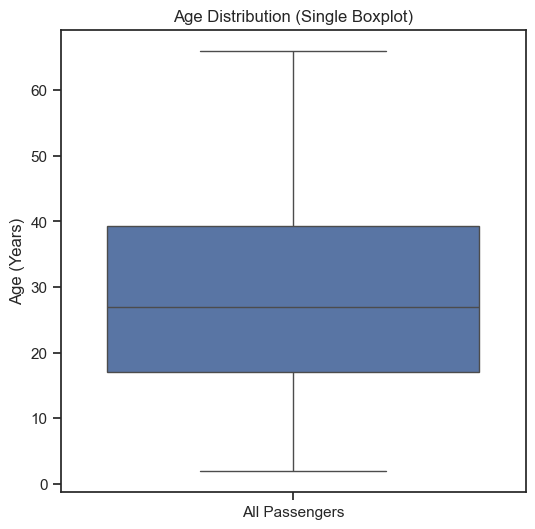

In [2]:
print("🎯 LAB 11.2: Basic Seaborn Boxplot")

plt.figure(figsize=(6, 6))

# In Matplotlib, you used: plt.boxplot(age_clean)
# In Seaborn, you pass the DataFrame and column name:
ax = sns.boxplot(data=titanic_df, y='Age')

ax.set_title('Age Distribution (Single Boxplot)')
ax.set_ylabel('Age (Years)')

# Set tick positions *before* setting labels to avoid a UserWarning
ax.set_xticks([0]) 
ax.set_xticklabels(['All Passengers'])

plt.show()

## 2. Comparing Distributions with Multiple Box Plots

This is where Seaborn's power becomes obvious. You **do not** need to create `age_by_class` lists.

You simply tell Seaborn:
* `data=titanic_df` (the full DataFrame)
* `x='Pclass'` (the categorical column for groups)
* `y='Age'` (the numerical column to plot)

Seaborn handles all the grouping, separation, and labeling automatically.

🎯 LAB 11.3: Multiple Boxplots (The Seaborn Way)


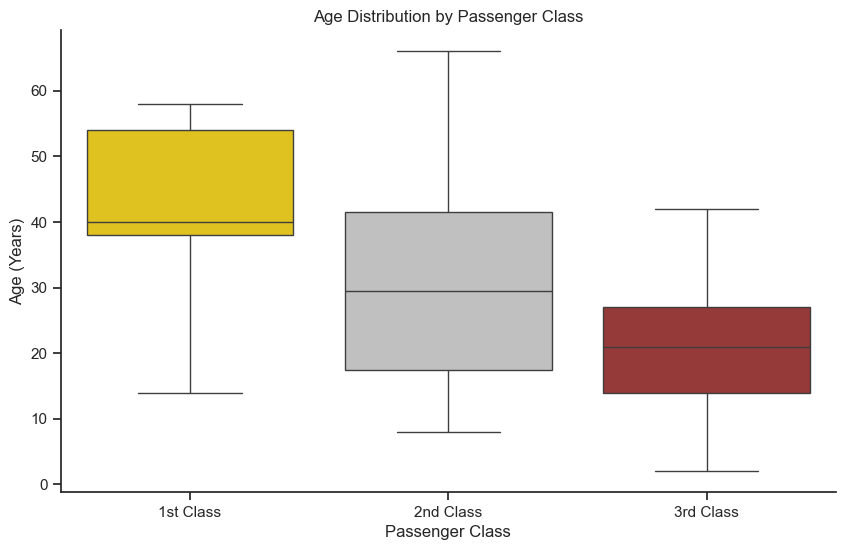


🎉 Notice: No manual data grouping or color loops needed!


In [3]:
print("🎯 LAB 11.3: Multiple Boxplots (The Seaborn Way)")

fig, ax = plt.subplots(figsize=(10, 6))

# In Matplotlib, you used: bp = ax.boxplot(age_by_class, ...)
# In Seaborn, it's one line:
# To color the x-categories, we set 'hue' to the x-variable and turn off the legend
sns.boxplot(
    data=titanic_df, 
    x='Pclass', 
    y='Age',
    hue='Pclass', # Use Pclass for hue to enable palette
    palette=['gold', 'silver', 'brown'], # Replaces manual color loop
    ax=ax,
    legend=False # Disable redundant legend
)

# Matplotlib customization still works
ax.set_title('Age Distribution by Passenger Class')
ax.set_ylabel('Age (Years)')
ax.set_xlabel('Passenger Class')

# Set tick positions and labels to avoid warnings
ax.set_xticks([0, 1, 2]) 
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

sns.despine()
plt.show()

print("\n🎉 Notice: No manual data grouping or color loops needed!")

## 3. Violin Plots (`sns.violinplot`)

`sns.violinplot` works exactly like `sns.boxplot`. It combines a box plot (visible inside, set with `inner=`) with a Kernel Density Estimate (KDE) on the outside to show the shape of the distribution.

🎯 LAB 11.4: Basic Violin Plot


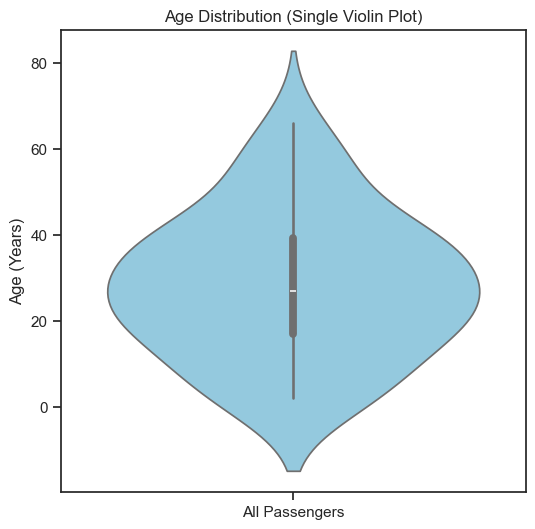

In [4]:
print("🎯 LAB 11.4: Basic Violin Plot")

fig, ax = plt.subplots(figsize=(6, 6))

# In Matplotlib, you used: ax.violinplot(age_clean, ...)
# In Seaborn:
# We add inner='box' to show the boxplot inside the violin
sns.violinplot(data=titanic_df, y='Age', color='skyblue', inner='box')

ax.set_title('Age Distribution (Single Violin Plot)')
ax.set_ylabel('Age (Years)')
ax.set_xticks([0])
ax.set_xticklabels(['All Passengers'])

plt.show()

## 4. Comparing Distributions with Multiple Violin Plots

Again, this works just like `sns.boxplot`. We replace the manual `age_by_sex` list by simply specifying `x='Sex'`.

🎯 LAB 11.5: Multiple Violin Plots by Sex


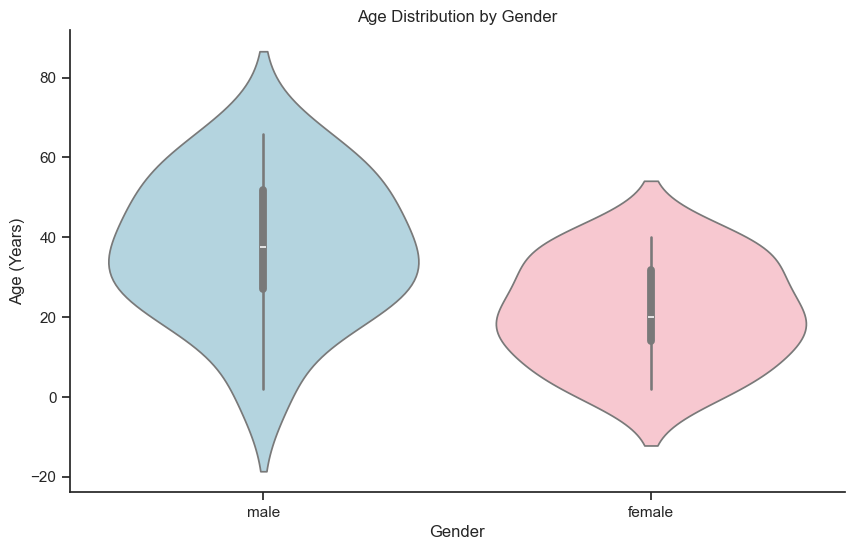

In [5]:
print("🎯 LAB 11.5: Multiple Violin Plots by Sex")

fig, ax = plt.subplots(figsize=(10, 6))

# In Matplotlib, you used: vp = ax.violinplot(age_by_sex, ...)
# In Seaborn:
sns.violinplot(
    data=titanic_df, 
    x='Sex', 
    y='Age',
    hue='Sex', # Use x-var for hue to enable palette
    palette=['lightblue', 'pink'], # Replaces manual color loop
    ax=ax,
    legend=False # Disable legend
)

ax.set_title('Age Distribution by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Age (Years)')

sns.despine()
plt.show()

## 5. Advanced Grouping with `hue` (and `split`)

Seaborn makes it easy to add *another* layer of comparison. What if you want to see Age by Class, but *also* split by Sex?

In Matplotlib, this would be very difficult. In Seaborn, you just add the `hue='Sex'` parameter. For violin plots, you can also add `split=True` to create a "split-violin" which is very data-rich.

🎯 LAB 11.6: Advanced Grouping with 'hue' and 'split'


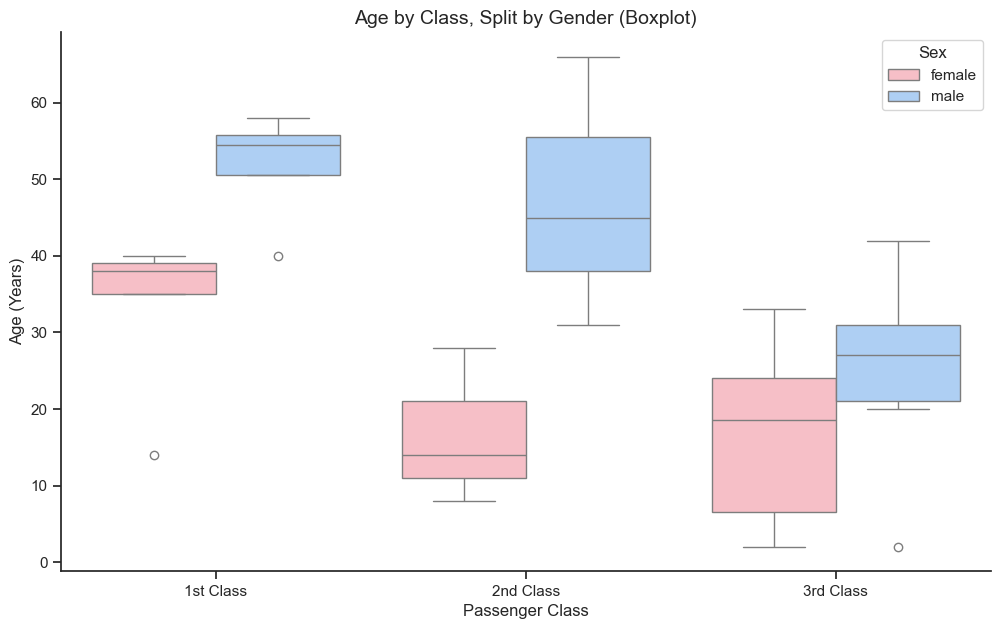

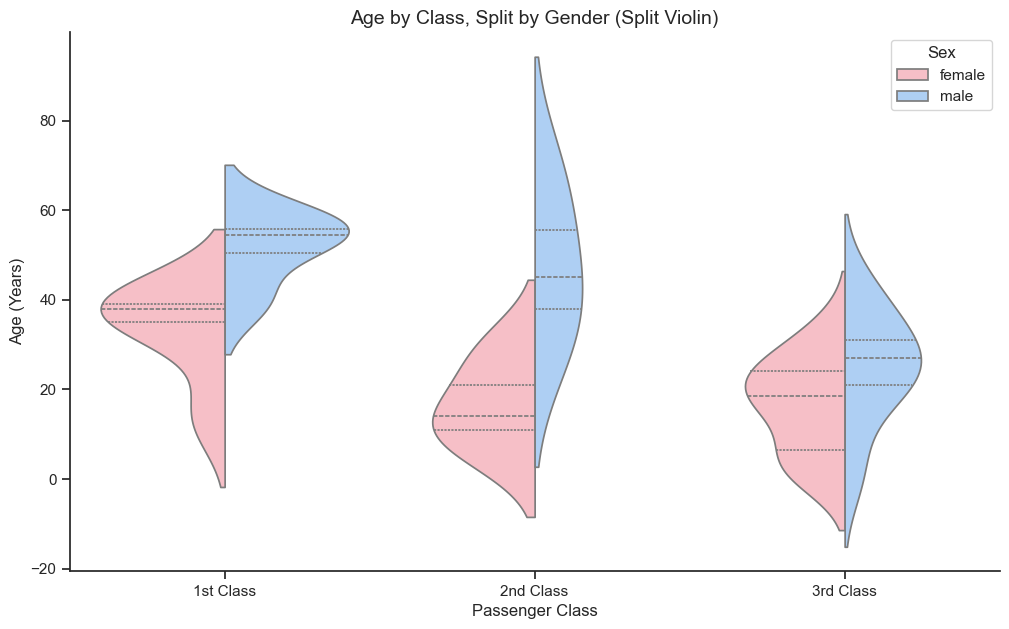


✅ Seaborn's `hue` and `split` parameters add a second categorical dimension effortlessly.


In [6]:
print("🎯 LAB 11.6: Advanced Grouping with 'hue' and 'split'")

# --- Boxplot with hue ---
plt.figure(figsize=(12, 7))
ax1 = sns.boxplot(
    data=titanic_df, 
    x='Pclass', 
    y='Age', 
    hue='Sex',
    palette={"male": "#a2cffe", "female": "#ffb6c1"} # Light blue/pink
)
ax1.set_title('Age by Class, Split by Gender (Boxplot)', fontsize=14)
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Age (Years)')
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
sns.despine()
plt.show()


# --- Violinplot with hue and split=True ---
plt.figure(figsize=(12, 7))
ax2 = sns.violinplot(
    data=titanic_df, 
    x='Pclass', 
    y='Age', 
    hue='Sex',
    palette={"male": "#a2cffe", "female": "#ffb6c1"},
    split=True, # This combines male/female into one violin
    inner='quartile' # Shows quartiles instead of a box
)
ax2.set_title('Age by Class, Split by Gender (Split Violin)', fontsize=14)
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Age (Years)')
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
sns.despine()
plt.show()

print("\n✅ Seaborn's `hue` and `split` parameters add a second categorical dimension effortlessly.")

## 6. Figure-level Plots: `sns.catplot`

The **Figure-level** function for `boxplot` and `violinplot` is `sns.catplot()`.

This function is incredibly powerful. Instead of you creating subplots with `plt.subplots()`, `catplot` creates the subplots *for you* using the `col` parameter. This is the "Seaborn-native" way to create your dashboard.

🎯 LAB 11.7: Figure-level Plots with sns.catplot


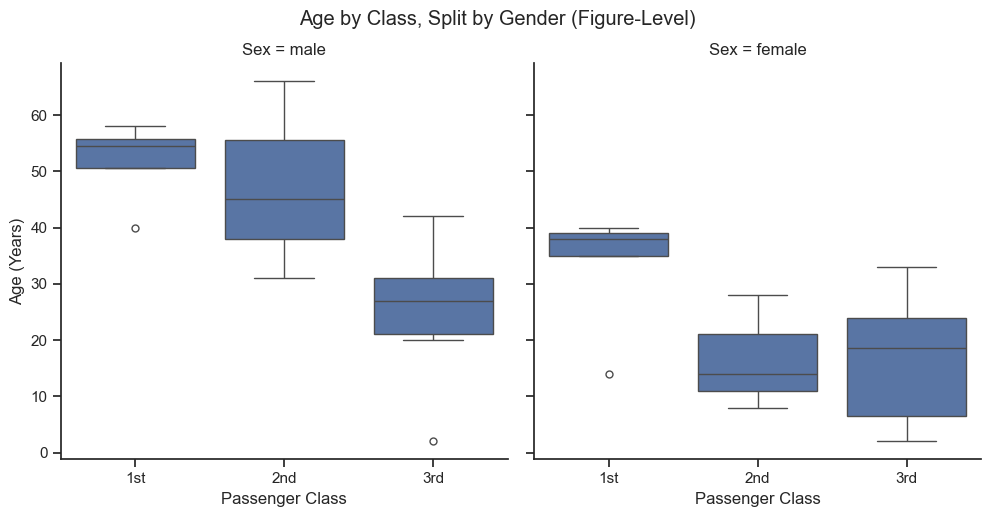

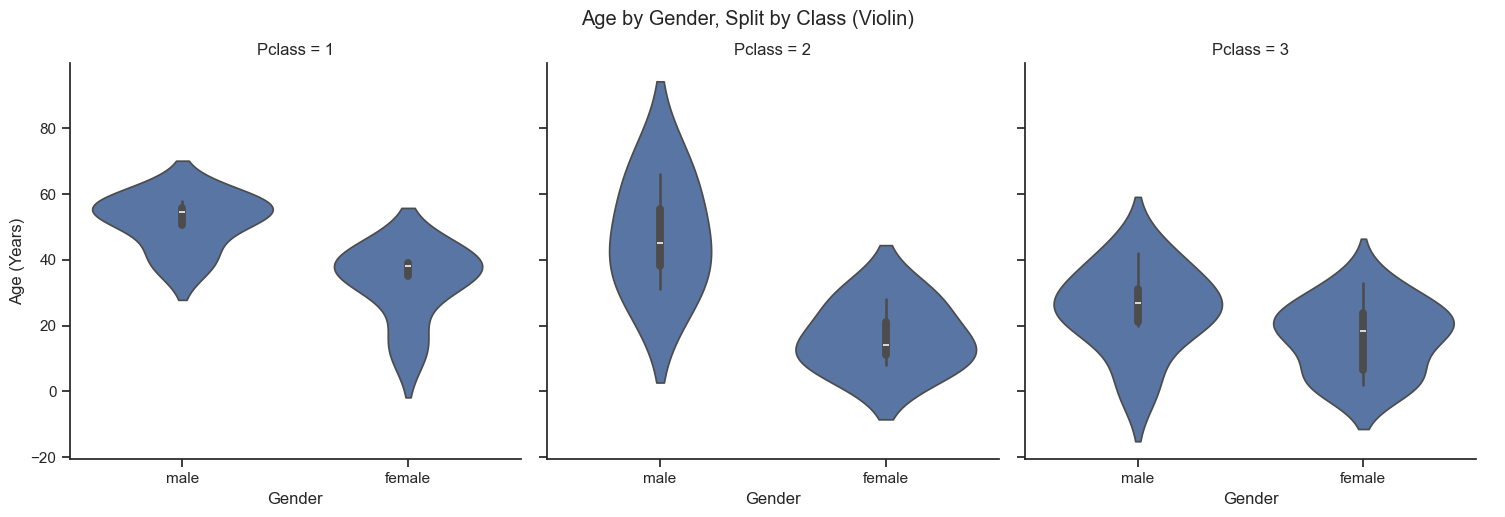

In [7]:
print("🎯 LAB 11.7: Figure-level Plots with sns.catplot")

# This one function replaces the Matplotlib 1x2 dashboard
# It automatically creates two subplots, one for col='male' and one for col='female'
g = sns.catplot(
    data=titanic_df,
    x='Pclass',
    y='Age',
    kind='box',  # Tell catplot to make boxplots
    col='Sex'    # Create subplots based on the 'Sex' column
)

g.fig.suptitle('Age by Class, Split by Gender (Figure-Level)', y=1.03) # Add title
g.set_axis_labels("Passenger Class", "Age (Years)") # Set labels for all subplots
g.set_xticklabels(['1st', '2nd', '3rd'])

plt.show()

# --- Now with violin plots ---
# Notice we just change 'kind' and 'col'
g = sns.catplot(
    data=titanic_df,
    x='Sex',       # Plot Sex on the x-axis
    y='Age',
    kind='violin', # Just change the kind!
    col='Pclass'   # Create columns for each Pclass
)
g.fig.suptitle('Age by Gender, Split by Class (Violin)', y=1.03)
g.set_axis_labels("Gender", "Age (Years)")

plt.show()

## 7. Practice Project: Box Plot vs. Violin Plot Dashboard (Seaborn)

Let's re-create the 1x2 dashboard from the Matplotlib notebook. We will use `plt.subplots()` to create the grid, and then plot `sns.boxplot` and `sns.violinplot` onto the two axes.

🎯 LAB 11.8: PRACTICE PROJECT - Box vs. Violin Dashboard
💾 Dashboard saved as 'seaborn_part11_box_violin_dashboard.png'


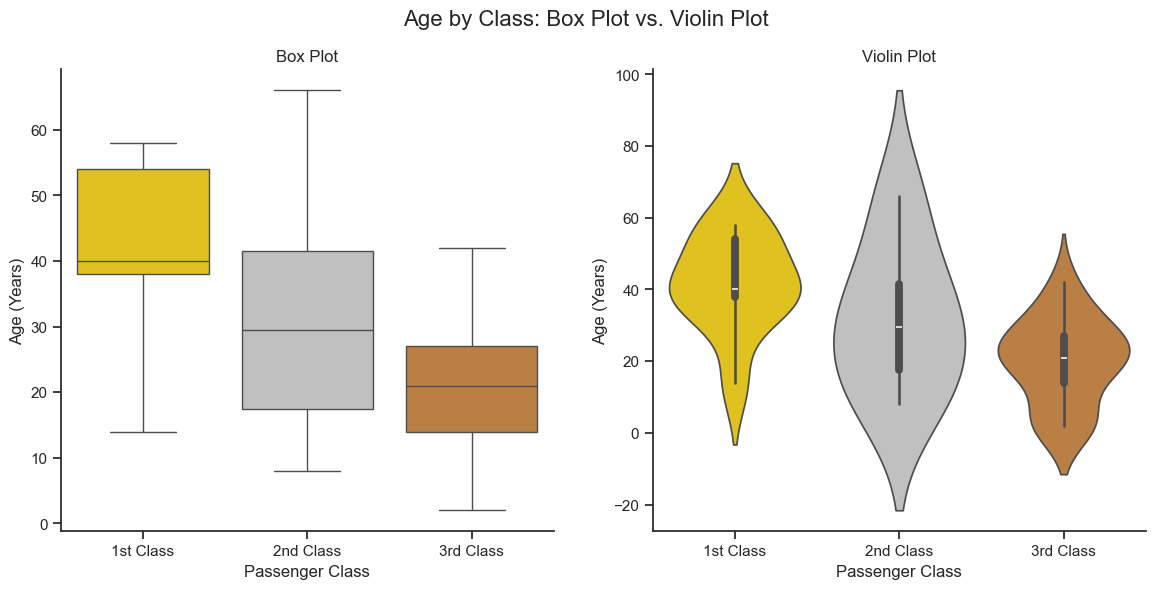


🎉 Part 11 complete!


In [8]:
print("🎯 LAB 11.8: PRACTICE PROJECT - Box vs. Violin Dashboard")

# Set a theme for the project
sns.set_theme(style="ticks", palette="pastel")

# 1. Create the Matplotlib figure and axes
# This defines ax1 and ax2, avoiding any NameError
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Age by Class: Box Plot vs. Violin Plot', fontsize=16)

# 2. Plot 1: Box Plot (Axes-level)
sns.boxplot(
    data=titanic_df, 
    x='Pclass', 
    y='Age',
    hue='Pclass', # Use Pclass for hue to enable palette
    palette=['#FFD700', '#C0C0C0', '#CD7F32'], # Gold, Silver, Bronze
    ax=ax1,
    legend=False # Disable legend
)
ax1.set_title('Box Plot')
ax1.set_xticks([0, 1, 2]) # Set tick positions
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class']) # Set tick labels
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Age (Years)')

# 3. Plot 2: Violin Plot (Axes-level)
sns.violinplot(
    data=titanic_df, 
    x='Pclass', 
    y='Age',
    hue='Pclass', # Use Pclass for hue to enable palette
    palette=['#FFD700', '#C0C0C0', '#CD7F32'], # Gold, Silver, Bronze
    ax=ax2,
    legend=False # Disable legend
)
ax2.set_title('Violin Plot')
ax2.set_xticks([0, 1, 2]) # Set tick positions
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class']) # Set tick labels
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Age (Years)')

# 4. Final Touches
sns.despine() # Remove top/right spines from both plots

# 5. Save and Show
fig.savefig('seaborn_part11_box_violin_dashboard.png', dpi=300)
print("💾 Dashboard saved as 'seaborn_part11_box_violin_dashboard.png'")
plt.show()

print("\n🎉 Part 11 complete!")